In [21]:
# https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [2]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
from matplotlib import pyplot as plt

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

plt.rc('font', family=font_name)
plt.rc('font', family='NanumBarunGothic')
fm._rebuild()

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from imblearn.over_sampling import SMOTE
import xgboost

from scipy.stats import pearsonr, chi2_contingency
from itertools import combinations
from statsmodels.stats.proportion import proportion_confint

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
attrition = pd.read_csv("/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv")
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
print(attrition.shape)

(1470, 35)


## KDE Plot

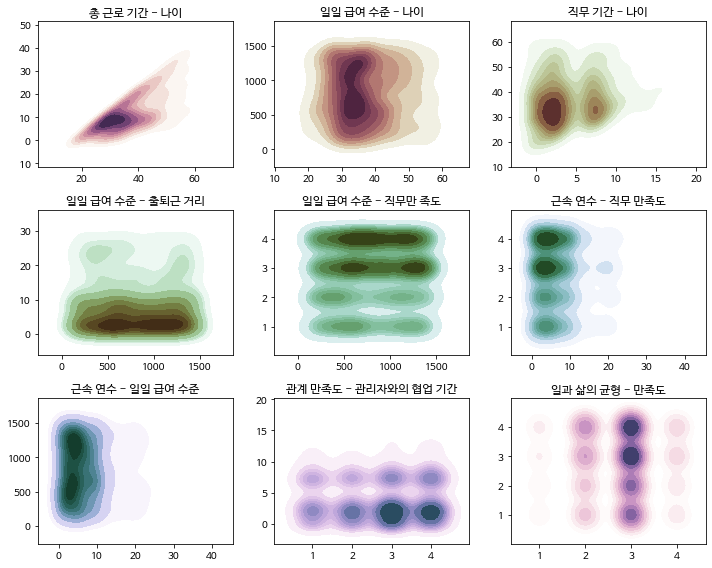

In [6]:
# 여러 개의 KDE Plot 생성 준비
f, axes = plt.subplots(3, 3, figsize=(10, 8), 
                       sharex=False, sharey=False)

# Plot 색상 설정
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

x = attrition['Age'].values
y = attrition['TotalWorkingYears'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = '총 근로 기간 - 나이')

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)

# Generate and plot
x = attrition['Age'].values
y = attrition['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = '일일 급여 수준 - 나이')

cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsInCurrentRole'].values
y = attrition['Age'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set( title = '직무 기간 - 나이')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Generate and plot
x = attrition['DailyRate'].values
y = attrition['DistanceFromHome'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,0])
axes[1,0].set( title = '일일 급여 수준 - 출퇴근 거리')

cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
# Generate and plot
x = attrition['DailyRate'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set( title = '일일 급여 수준 - 직무만 족도')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsAtCompany'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,2])
axes[1,2].set( title = '근속 연수 - 직무 만족도')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsAtCompany'].values
y = attrition['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,0])
axes[2,0].set( title = '근속 연수 - 일일 급여 수준')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# Generate and plot
x = attrition['RelationshipSatisfaction'].values
y = attrition['YearsWithCurrManager'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,1])
axes[2,1].set( title = '관계 만족도 - 관리자와의 협업 기간')

cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['WorkLifeBalance'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,2])
axes[2,2].set( title = '일과 삶의 균형 - 만족도')

f.tight_layout()

In [7]:
display(attrition.isnull().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [8]:
print('중복된 항목 수 : ', len(attrition[attrition.duplicated()]))

중복된 항목 수 :  0


In [9]:
print(attrition.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [11]:
dtype_data = attrition.dtypes.reset_index()
dtype_data.columns = ['Count', 'Column Type']
dtype_data = dtype_data.groupby('Column Type').aggregate('count').reset_index()

print(dtype_data)

  Column Type  Count
0       int64     26
1      object      9


In [12]:
attrition.select_dtypes(include=['number']).head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [13]:
attrition.select_dtypes(include=np.number).head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [15]:
num_feat = attrition.select_dtypes('number').columns.values
attrition_num = attrition[num_feat].copy()

In [17]:
print(attrition_num.nunique().sort_values())

StandardHours                  1
EmployeeCount                  1
PerformanceRating              2
RelationshipSatisfaction       4
EnvironmentSatisfaction        4
WorkLifeBalance                4
JobInvolvement                 4
StockOptionLevel               4
JobSatisfaction                4
JobLevel                       5
Education                      5
TrainingTimesLastYear          7
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate                    71
DailyRate                    886
MonthlyIncome               1349
MonthlyRate                 1427
EmployeeNumber              1470
dtype: int64


In [18]:
attrition_num = attrition_num.drop(['StandardHours', 'EmployeeCount', 'EmployeeNumber'], axis=1, errors='ignore')

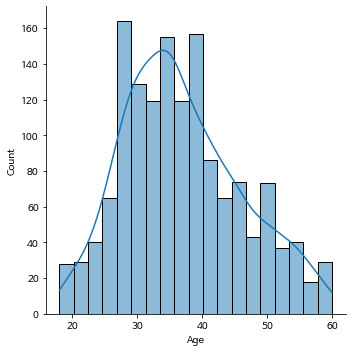

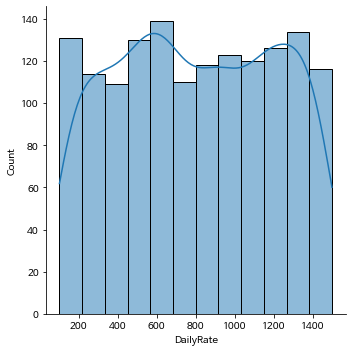

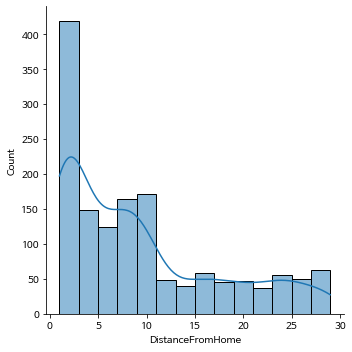

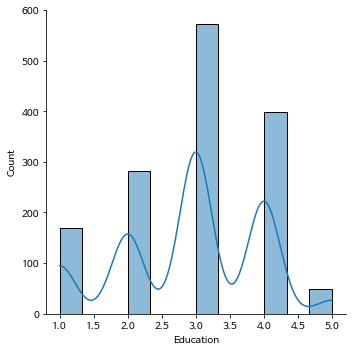

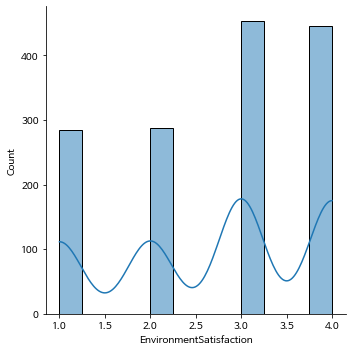

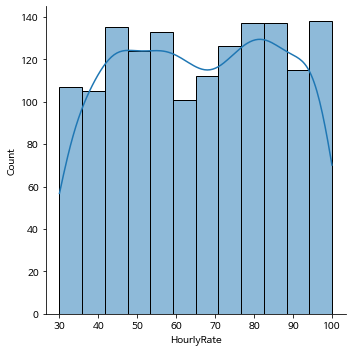

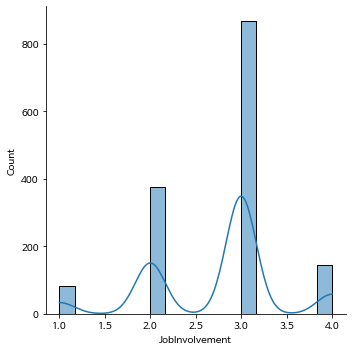

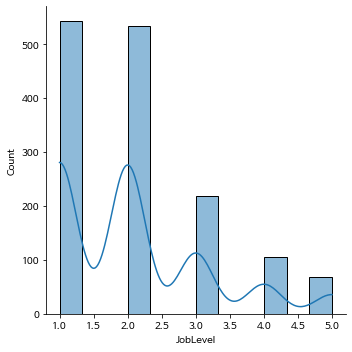

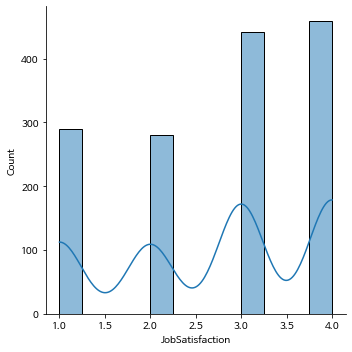

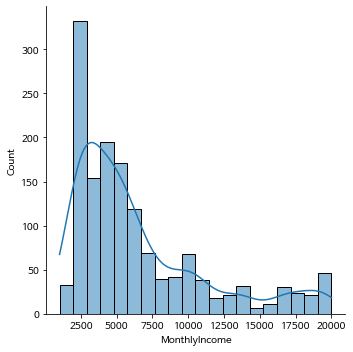

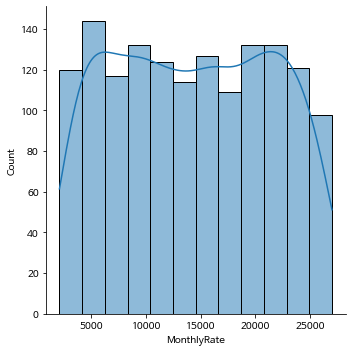

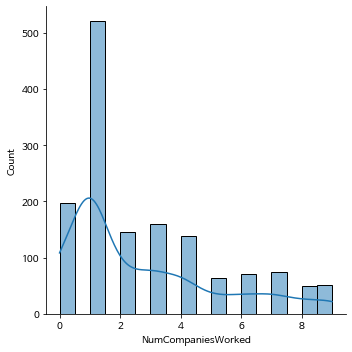

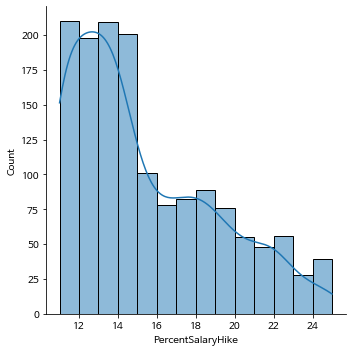

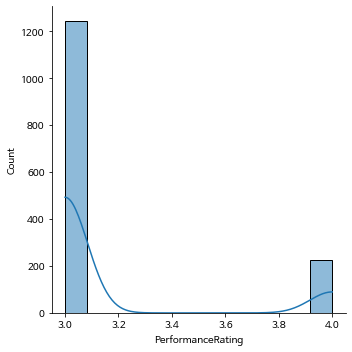

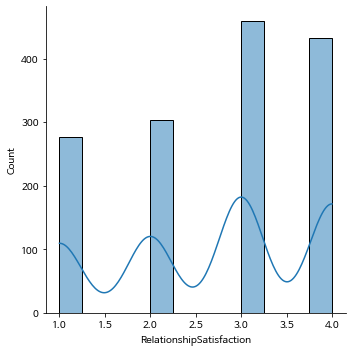

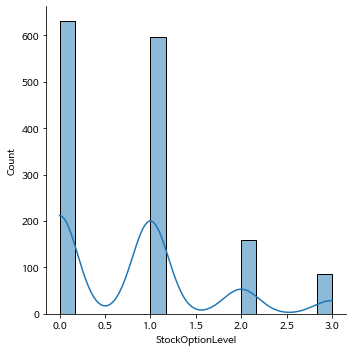

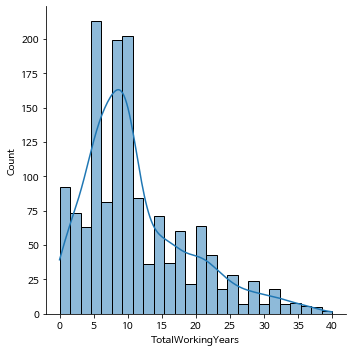

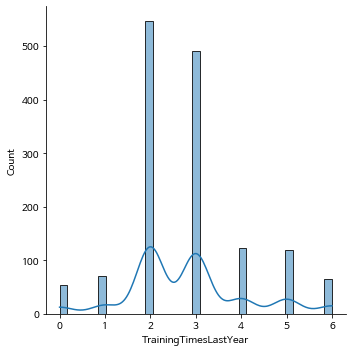

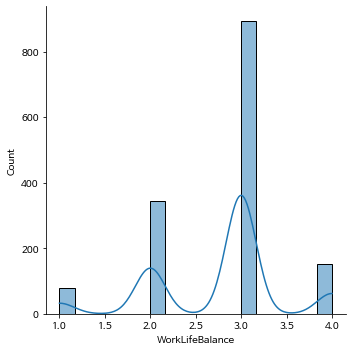

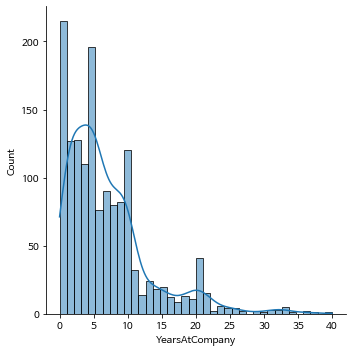

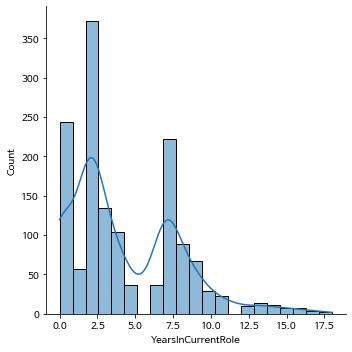

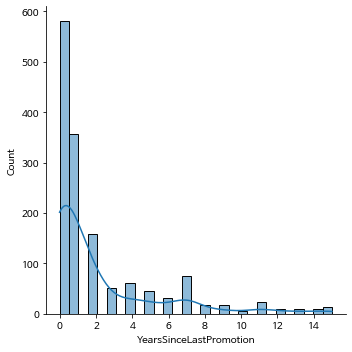

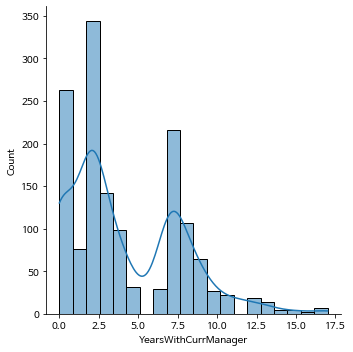

In [20]:
col_attrition_num = attrition_num.columns.values
for i in range(0, len(col_attrition_num)) :
  sns.displot(attrition_num[col_attrition_num[i]], kde=True) # ked : kernel density

In [22]:
attrition.select_dtypes(include=['object', 'category']).head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [23]:
cat_feat = attrition.select_dtypes(include=['object', 'category']).columns.values
attrition_cat = attrition[cat_feat].copy()
print(attrition_cat.nunique().sort_values())

Over18            1
Attrition         2
Gender            2
OverTime          2
BusinessTravel    3
Department        3
MaritalStatus     3
EducationField    6
JobRole           9
dtype: int64


In [24]:
# 유일한 값이 1 또는 모든 행이 다른 컬럼 삭제

In [25]:
attrition_cat = attrition_cat.drop(['Over18', 'Attrition'], axis=1, errors='ignore')

In [26]:
attrition_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


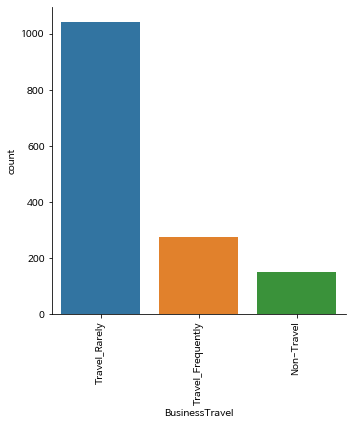

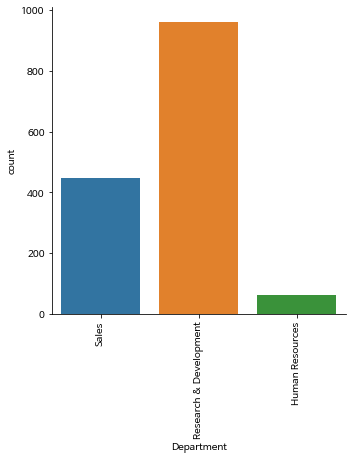

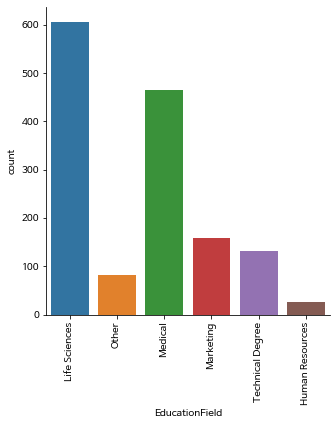

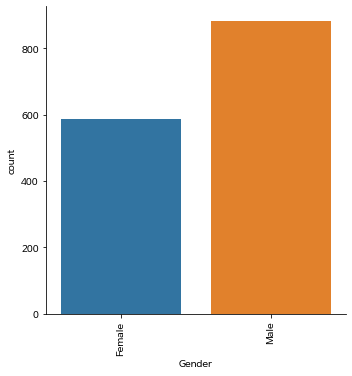

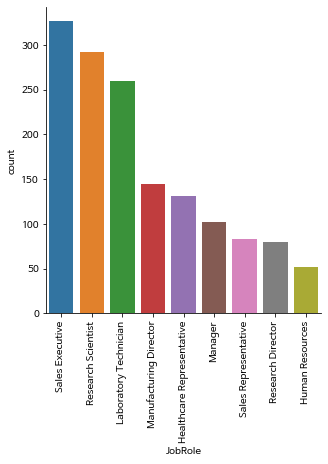

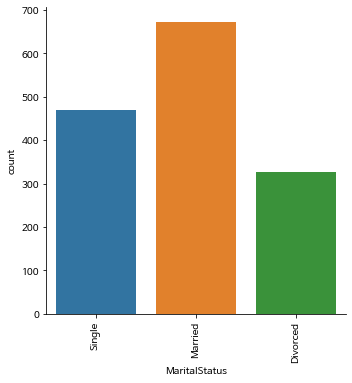

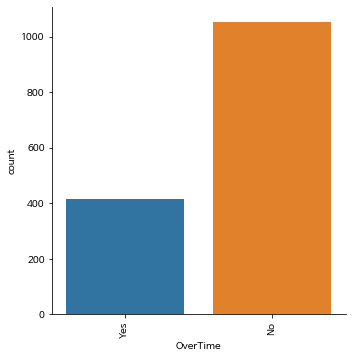

In [27]:
for col in attrition_cat.columns :
  fig = sns.catplot(x=col, kind='count', data=attrition_cat, hue=None)
  fig.set_xticklabels(rotation=90)
  plt.show()

## Feature 인코딩
* LabelEncoder : 선형성을 가지는 머신러닝 기법에 좋지 않다
* OneHotEncoder vs get_dummies

In [28]:
attrition_cat_dummies = pd.get_dummies(attrition_cat)
attrition_cat_dummies.head(3)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [31]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
attrition_cat_ohe = ohe.fit_transform(attrition_cat).toarray()
attrition_cat_ohe = pd.DataFrame(attrition_cat_ohe)
attrition_cat_ohe.columns = ['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes']

print("OneHot Encoder 결과 : ")  
print(attrition_cat_ohe.iloc[:3,:])

OneHot Encoder 결과 : 
   BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  \
0                        0.0                               0.0   
1                        0.0                               1.0   
2                        0.0                               0.0   

   BusinessTravel_Travel_Rarely  Department_Human Resources  \
0                           1.0                         0.0   
1                           0.0                         0.0   
2                           1.0                         0.0   

   Department_Research & Development  Department_Sales  \
0                                0.0               1.0   
1                                1.0               0.0   
2                                1.0               0.0   

   EducationField_Human Resources  EducationField_Life Sciences  \
0                             0.0                           1.0   
1                             0.0                           1.0   
2                          

#### Target Feature 정의
* Pandas 의 apply
* y.isin([Target에 해당하는 컬럼들]).astype('int) 이용

In [35]:
target_map = {'Yes' : 1, 'No' : 0}

attrition['Attrition_numerical'] = attrition['Attrition'].apply(lambda x : target_map[x])
attrition['Attrition_numerical'].value_counts()

0    1233
1     237
Name: Attrition_numerical, dtype: int64

In [33]:
y = attrition['Attrition'].copy()
y = y.isin(['Yes']).astype('int')
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

#### 1) 숫자형 Feature
  * 숫자형 컬럼들 간 Pearson R 상관 계수를 구한다
  * 상관 계수가 0.9 이상인 컬럼들 중 가장 큰 컬럼을 제거해 본다
  * 컬럼들 간 조합 생성 : comb_num_feat = np.array(list(combinations(num_feat, 2)))
  * Pearson R 상관 계수 구하기 : pearsonr(x1, x2)[0]

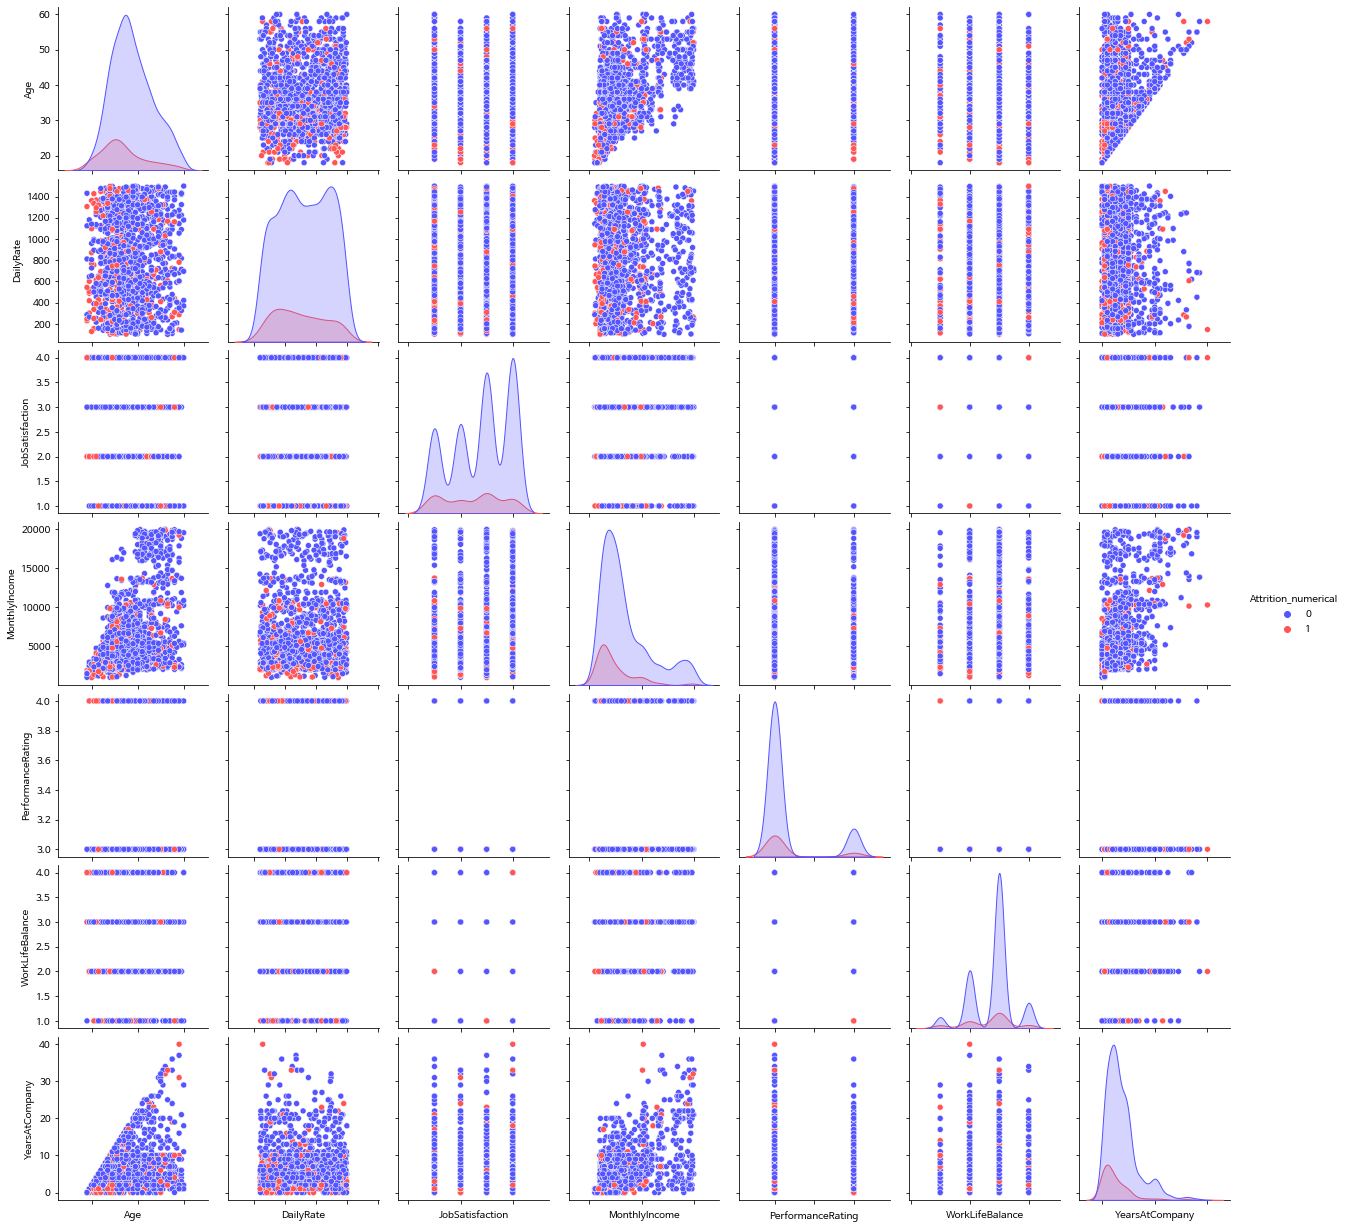

In [36]:
numerical = [u'Age', u'DailyRate',  u'JobSatisfaction',
       u'MonthlyIncome', u'PerformanceRating',
        u'WorkLifeBalance', u'YearsAtCompany', u'Attrition_numerical']

g = sns.pairplot(attrition[numerical], hue='Attrition_numerical', palette='seismic', diag_kind = 'kde',diag_kws=dict(shade=True))
g.set(xticklabels=[])

#### 상관 계수 구하기

In [37]:
num_feat = attrition_num.columns.values
comb_num_feat = np.array(list(combinations(num_feat, 2)))
corr_num_feat = np.array([])
for comb in comb_num_feat:
    corr = pearsonr(attrition_num[comb[0]], attrition_num[comb[1]])[0]
    corr_num_feat = np.append(corr_num_feat, corr)

In [38]:
high_corr_num = comb_num_feat[np.abs(corr_num_feat) >= 0.9]
high_corr_num

array([['JobLevel', 'MonthlyIncome']], dtype='<U24')

In [39]:
# plotly 안 보이는 문제 해결
import plotly.io as pio
pio.renderers.default = 'colab'
pio.renderers

data = [
    go.Heatmap(
        z=attrition_num.astype(float).corr().values, # 피어슨 상관계수
        x=attrition_num.columns.values,
        y=attrition_num.columns.values,
        colorscale='Viridis',
        reversescale = False,
        opacity = 1.0
        
    )
]


layout = go.Layout(
    title='숫자형 Feature 들의 피어슨 상관계수',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')



In [40]:
attrition_num = attrition_num.drop(np.unique(high_corr_num[:, 0]), axis=1, errors='ignore')

#### 1) 범주형 Feature

In [41]:
attrition_cat_dummies.nunique().sort_values()

BusinessTravel_Non-Travel            2
MaritalStatus_Single                 2
MaritalStatus_Married                2
MaritalStatus_Divorced               2
JobRole_Sales Representative         2
JobRole_Sales Executive              2
JobRole_Research Scientist           2
JobRole_Research Director            2
JobRole_Manufacturing Director       2
JobRole_Manager                      2
JobRole_Laboratory Technician        2
JobRole_Human Resources              2
JobRole_Healthcare Representative    2
Gender_Male                          2
Gender_Female                        2
EducationField_Technical Degree      2
EducationField_Other                 2
EducationField_Medical               2
EducationField_Marketing             2
EducationField_Life Sciences         2
EducationField_Human Resources       2
Department_Sales                     2
Department_Research & Development    2
Department_Human Resources           2
BusinessTravel_Travel_Rarely         2
BusinessTravel_Travel_Fre

In [42]:
attrition_cat_dummies.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [43]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [44]:
rows= []

for var1 in attrition_cat_dummies:
  col = []
  for var2 in attrition_cat_dummies :
    cramers =cramers_V(attrition_cat_dummies[var1], attrition_cat_dummies[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = attrition_cat_dummies.columns, index =attrition_cat_dummies.columns)

df.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
BusinessTravel_Non-Travel,0.99,0.03,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
BusinessTravel_Travel_Frequently,0.03,1.00,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
BusinessTravel_Travel_Rarely,0.27,0.56,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
Department_Human Resources,0.00,0.00,0.00,0.98,0.08,0.02,0.40,0.00,0.00,0.00,...,0.00,0.00,0.01,0.01,0.00,0.0,0.0,0.0,0.0,0.0
Department_Research & Development,0.00,0.00,0.00,0.08,1.00,0.82,0.03,0.02,0.23,0.03,...,0.06,0.03,0.13,0.54,0.11,0.0,0.0,0.0,0.0,0.0


In [ ]:
high_corr_num = comb_cat_dummies_feat[np.abs(corr_cat_dummies_feat) >= 0.9]
high_corr_num

In [46]:
attrition_final = pd.concat([attrition_num, attrition_cat_dummies], axis=1)

In [47]:
attrition_final.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,4,5993,19479,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,5130,24907,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,3,2090,2396,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,3,2909,23159,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,40,3,2,3468,16632,...,0,0,0,0,0,0,1,0,1,0


#### Target Feature 불균형 문제 처리

In [48]:
data = [go.Bar(
            x=attrition["Attrition"].value_counts().index.values,
            y= attrition["Attrition"].value_counts().values
    )]

py.iplot(data, filename='basic-bar')

#### SMOTE 를 이용한 오버샘플링 적용

In [49]:
target = attrition["Attrition_numerical"]

In [52]:
from sklearn.model_selection import train_test_split

train, test, target_train, target_val = train_test_split(attrition_final, 
                                                         target, 
                                                         train_size= 0.80,
                                                         random_state=0)


In [56]:
oversampler = SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(train,target_train)

In [73]:
seed = 0
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators' :100,
    'max_depth' : 12,
    'min_samples_leaf' : 2,
    'max_features' : 0.1,
    'random_state' : seed,
    'verbose': 0
}


In [74]:
rf = RandomForestClassifier(**rf_params)
rf.fit(smote_train, smote_target)
rf_predictions = rf.predict(test)
print("Accuracy score: {}".format(accuracy_score(target_val, rf_predictions)))
print("="*60)
print(classification_report(target_val, rf_predictions))

Accuracy score: 0.8707482993197279
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       245
           1       0.76      0.33      0.46        49

    accuracy                           0.87       294
   macro avg       0.82      0.65      0.69       294
weighted avg       0.86      0.87      0.85       294



In [75]:
rf.feature_importances_

array([0.03194295, 0.02678164, 0.02206161, 0.01514729, 0.03262663,
       0.02507426, 0.02339672, 0.04931791, 0.05309539, 0.03043832,
       0.01294992, 0.01560207, 0.00382542, 0.02351937, 0.04673799,
       0.03932995, 0.01453314, 0.02164091, 0.03155647, 0.03120879,
       0.01140257, 0.03283694, 0.01070151, 0.00446754, 0.02095809,
       0.00226665, 0.03135472, 0.01100927, 0.00072602, 0.03332823,
       0.00349429, 0.04475866, 0.00337729, 0.00479226, 0.01765752,
       0.01161617, 0.00267304, 0.0012952 , 0.00286033, 0.0030553 ,
       0.00765559, 0.00241727, 0.00810096, 0.0079669 , 0.00130993,
       0.01901159, 0.02265204, 0.00641745, 0.10623379, 0.0128161 ])

In [79]:
seed = 0
gb_params = {
    'n_estimators' :1000,
    'max_depth' : 6,
    'min_samples_leaf' : 2,
    'max_features' : 0.7,
    'learning_rate' : 0.25,
    'random_state' : seed,
    'verbose': 0
}


In [80]:
gb = GradientBoostingClassifier(**gb_params)
gb.fit(smote_train, smote_target)
gb_predictions = gb.predict(test)
print("Accuracy score: {}".format(accuracy_score(target_val, gb_predictions)))
print(classification_report(target_val, gb_predictions))

Accuracy score: 0.8537414965986394
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       245
           1       0.62      0.33      0.43        49

    accuracy                           0.85       294
   macro avg       0.75      0.64      0.67       294
weighted avg       0.83      0.85      0.83       294



In [81]:
gb.feature_importances_

array([2.49003701e-02, 2.11269851e-02, 1.50297375e-02, 8.93685591e-03,
       3.18873042e-02, 1.45216620e-02, 2.97514287e-02, 3.67877798e-02,
       6.69778057e-02, 2.54486740e-02, 6.26894464e-03, 7.62619552e-03,
       1.94882634e-05, 1.37788398e-02, 5.67314242e-02, 2.31463262e-02,
       5.22084168e-03, 3.02437929e-02, 1.10552462e-02, 1.39030250e-02,
       6.39703304e-03, 2.25855281e-02, 4.58894052e-03, 2.04454942e-03,
       6.24390162e-03, 1.36043225e-02, 2.12640036e-02, 1.33296525e-02,
       1.25671746e-04, 1.95715260e-02, 8.16003300e-03, 2.71967174e-02,
       4.43544660e-03, 3.72901240e-03, 7.04148726e-03, 5.70805089e-03,
       3.41540202e-03, 3.24572213e-03, 1.14792425e-03, 8.71684617e-04,
       1.21311761e-02, 5.82746832e-04, 1.63053421e-02, 1.26491305e-02,
       6.88177192e-04, 8.80419252e-03, 1.45875615e-02, 4.49385138e-03,
       2.40361097e-01, 7.13273875e-02])

#### GridSearchCV 사용 최적 HyperParamter

In [64]:
from sklearn.model_selection import GridSearchCV

rf_params = {'n_estimators' : [10, 100],
           'max_depth' : [4, 8, 10, 12],
           'min_samples_leaf' : [2, 4, 8, 12],
           'max_features' : [0.1, 0.3, 0.5]
            }


rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=rf_params, cv=3, n_jobs=-1)

grid_cv.fit(smote_train, smote_target)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 12, 'max_features': 0.1, 'min_samples_leaf': 2, 'n_estimators': 100}
최고 예측 정확도: 0.9135


In [66]:
from sklearn.model_selection import GridSearchCV

gb_params = { 'n_estimators' : [1000, 1500],
           'max_depth' : [4, 6],
           'min_samples_leaf' : [2, 4],
           'max_features' : [0.7, 0.9],
           'learning_rate' : [0.25,0.3]
            }

gb_clf = GradientBoostingClassifier(random_state=0,)


grid_cv = GridSearchCV(gb_clf, param_grid = gb_params, cv = 3, n_jobs = -1)

grid_cv.fit(smote_train, smote_target)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'learning_rate': 0.25, 'max_depth': 6, 'max_features': 0.7, 'min_samples_leaf': 2, 'n_estimators': 1000}
최고 예측 정확도: 0.9064


#### Feature Importances >> 중요 인자 >> 의사 결정 도움

In [76]:

trace = go.Scatter(
    y = rf.feature_importances_,
    x = attrition_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = attrition_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

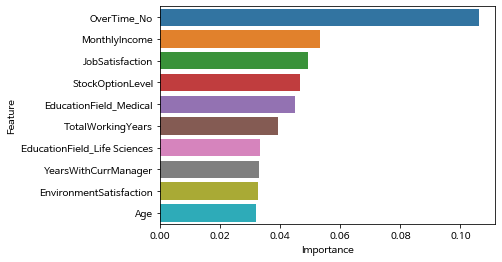

In [77]:
feat = attrition_final.columns.values
imp = rf.feature_importances_
df = pd.DataFrame({'Feature': feat, 'Importance': imp})
df = df.sort_values('Importance', ascending=False)[:10]
sns.barplot(x='Importance', y='Feature', data=df)

In [82]:

trace = go.Scatter(
    y = gb.feature_importances_,
    x = attrition_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        color = gb.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = attrition_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Model Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter')

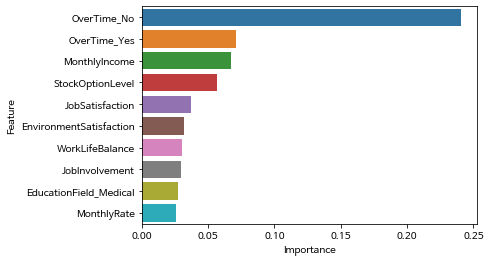

In [83]:
feat = attrition_final.columns.values
imp = gb.feature_importances_
df = pd.DataFrame({'Feature': feat, 'Importance': imp})
df = df.sort_values('Importance', ascending=False)[:10]
sns.barplot(x='Importance', y='Feature', data=df);